In [1]:
import numpy as np
import torch
from PQC import getHaar
import matplotlib.pyplot as plt
from QuantumState import *
from getPQCvector import *
from PQC_Loss import *

.0058, -0.0070, -0.0075, -0.0077, -0.0078, -0.0079, -0.0078, -0.0076,
        -0.0075, -0.0073, -0.0072, -0.0070, -0.0068, -0.0066, -0.0063, -0.0061,
        -0.0058, -0.0056, -0.0053, -0.0050, -0.0047, -0.0044, -0.0041, -0.0037,
        -0.0033, -0.0030, -0.0027, -0.0025, -0.0021, -0.0017, -0.0014, -0.0011,
        -0.0007, -0.0001,  0.0007,  0.0015,  0.0020,  0.0025,  0.0032,  0.0038,
         0.0044,  0.0049,  0.0052,  0.0056,  0.0064,  0.0073,  0.0080,  0.0087,
         0.0089,  0.0093,  0.0100,  0.0104,  0.0107,  0.0112,  0.0115,  0.0123,
         0.0140,  0.0155,  0.0175,  0.0200,  0.0226,  0.0257,  0.0286,  0.0310,
         0.0328,  0.0351,  0.0403], dtype=torch.float64,
       grad_fn=<IndexPutBackward>)
grad tensor([-1.1010e-01,  1.6343e-01,  1.9643e-01, -1.9612e-01,  3.0644e-01,
         3.5512e-01, -5.0802e-02, -1.1671e-03,  9.3339e-04, -6.6184e-02,
         1.7462e-09,  4.1910e-09])
loss tensor(0.3269, dtype=torch.float64, grad_fn=<SumBackward0>)
p' tensor([ 0.0069,  0.0112

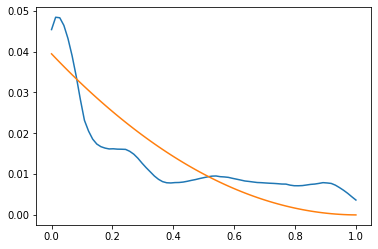

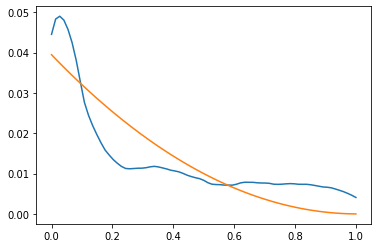

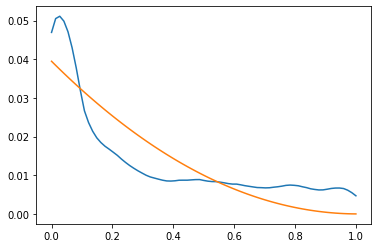

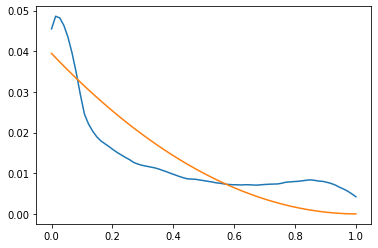

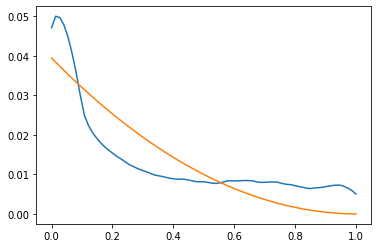

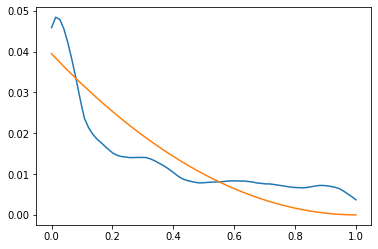

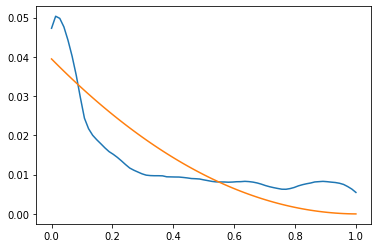

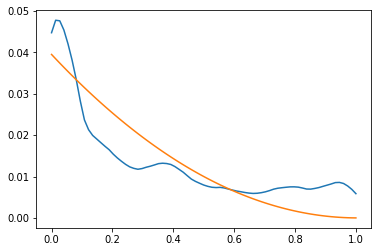

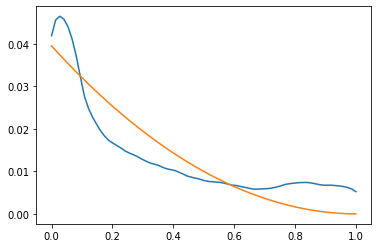

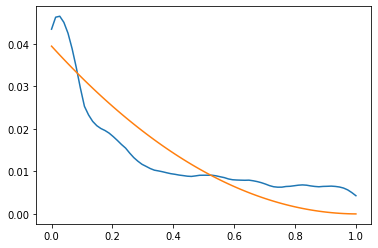

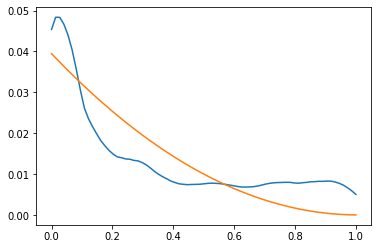

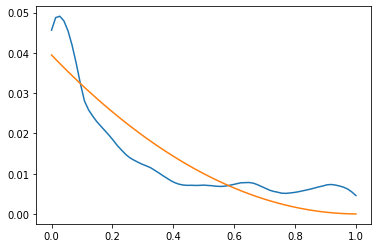

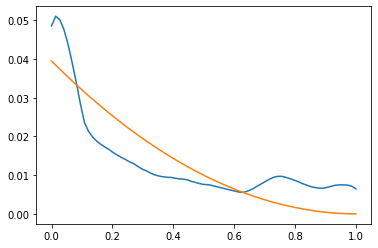

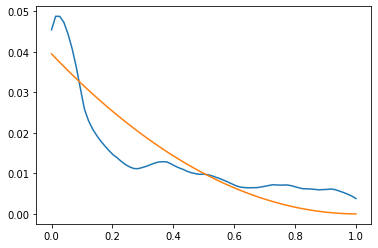

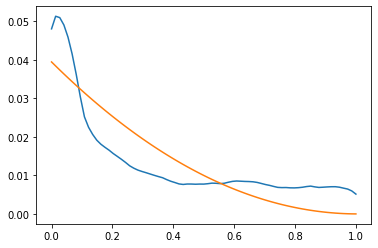

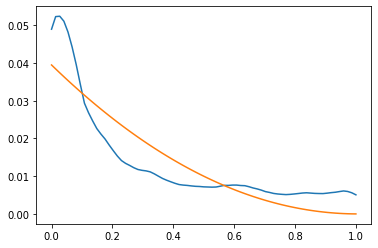

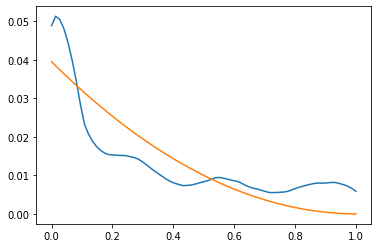

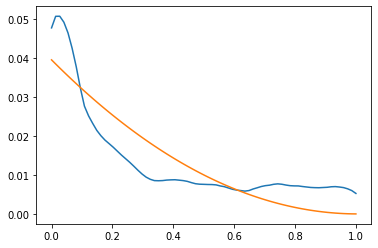

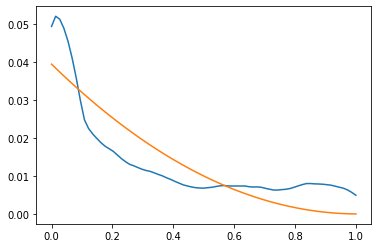

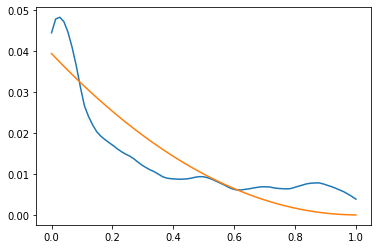

<Figure size 432x288 with 0 Axes>

In [2]:
params = torch.zeros(12)
params[0] = 1
params[3] = 1
params[6] = 2*np.pi
params[9] = 2*np.pi
params.requires_grad_(True)
learning_rate = 0.01
print(params)
for i in range(20):
    loss = Loss(params,verbose=1)
    loss.backward()
    print("grad",params.grad)
    print("loss",loss)
    with torch.no_grad():
        params -= learning_rate * params.grad
        params.grad.zero_()
    

In [3]:
Fidelity = None
# print(Fidelity)
num = 10000
bins = 250
haar_hist = torch.from_numpy(getHaar(reps=num,bins=bins,qubits=2))
params = torch.randn(12,requires_grad=True)

for i in range(num):
    v1 = getPQCvector(params)
    v2 = getPQCvector(params)
    F = torch.abs(torch.matmul(torch.conj(torch.transpose(v1,0,1)),v2))**2
    if Fidelity is None:
        Fidelity = F.view(1,)
    else:
        Fidelity = torch.cat((Fidelity,F.view(1,)),-1)
hist = histbin(Fidelity)
hist2 = torch.histc(Fidelity,min=0,max=1,bins=bins)/num
# print("histbin",hist.detach())
# print("histc",hist2.detach())
# x = np.linspace(0,1,250)
# plt.plot(x,hist)
# plt.plot(x,hist2)

In [4]:
def Loss(params, verbose=0, bins=75, num=1000):
    Fidelity = None
    # print(Fidelity)
    haar_hist = torch.from_numpy(getHaar(reps=num,bins=bins,qubits=2))
    for i in range(num):
        v1 = getPQCvector(params)
        v2 = getPQCvector(params)
        F = torch.abs(torch.matmul(torch.conj(torch.transpose(v1,0,1)),v2))**2
        if Fidelity is None:
            Fidelity = F.view(1,)
        else:
            Fidelity = torch.cat((Fidelity,F.view(1,)),-1)
    print(Fidelity)
    hist = histbin(Fidelity)
    if verbose == 1:
        x = np.linspace(0,1,bins)
        plt.plot(x,torch.detach(hist))
        plt.plot(x,torch.detach(haar_hist))
        plt.figure()
    # kl = torch.kl_div(hist.log(),haar_hist,reduction=1)
    p = hist*(hist/haar_hist).log()
    p[p!=p]=0
    return p.sum()

In [7]:
m = torch.nn.Linear(2,2,bias=True)
m.requires_grad_(False)
input = torch.randn(1,2)
output = m(input)
print(output.size())
print(m.weight[0])
print(m.bias)
m.weight[0,0]=1

torch.Size([1, 2])
tensor([-0.5320, -0.2468])
Parameter containing:
tensor([ 0.3516, -0.6015])


In [34]:
# m.weight[0,0]=1
m = torch.nn.Linear(2,2,bias=True)
m.requires_grad_(False)

print(list(m.parameters()))

for p in m.parameters():
    print(p)
    print(p[0].weight)
print(list(m.parameters()))

[Parameter containing:
tensor([[-0.0934, -0.4060],
        [-0.5118, -0.1921]]), Parameter containing:
tensor([ 0.2878, -0.5292])]
Parameter containing:
tensor([[-0.0934, -0.4060],
        [-0.5118, -0.1921]])


AttributeError: 'Tensor' object has no attribute 'weight'

In [92]:
Layer1 = torch.nn.Linear(2,2)
Layer1.requires_grad_(False)
input = torch.rand(2,)
h1 = Layer1(input)
print(h1)
a=torch.nn.ReLU()(h1)
print(a.tolist()[1])

tensor([-0.5192,  0.6990])
0.6990397572517395


In [14]:
params = torch.randn(12,)
Layer1 = torch.nn.Linear(2,2)
Layer1.requires_grad_(False)
Layer1.weight[0] = params[:2]
Layer1.weight[1] = params[2:4]
print(Layer1)
print(Layer1.weight[0])
print(Layer1.bias[0])
print(params[4:6])
Layer1.bias = params[4:6]


Linear(in_features=2, out_features=2, bias=True)
tensor([0.3575, 2.8662])
tensor(0.1008)
tensor([0.3506, 1.5560])


TypeError: cannot assign 'torch.FloatTensor' as parameter 'bias' (torch.nn.Parameter or None expected)


th tensor([0.1796, 0.7775])
th tensor([0.5044, 0.2162])
th tensor([0.3826, 0.7761])
th tensor([0.3314, 0.8207])
th tensor([0.3934, 0.7126])
th tensor([0.2050, 0.8053])
th tensor([0.4576, 0.5231])
th tensor([0.5032, 0.2277])
th tensor([0.5026, 0.2299])
th tensor([0.4667, 0.4473])
th tensor([0.4453, 0.5951])
th tensor([0.4854, 0.3618])
th tensor([0.3119, 0.8170])
th tensor([0.3349, 0.7815])
th tensor([0.4827, 0.3403])
th tensor([0.4369, 0.5720])
th tensor([0.4882, 0.3319])
th tensor([0.2272, 0.8185])
th tensor([0.2345, 0.8227])
th tensor([0.5112, 0.1597])
th tensor([0.4947, 0.2718])
th tensor([0.3886, 0.7130])
th tensor([0.3612, 0.7548])
th tensor([0.4829, 0.3473])
th tensor([0.2978, 0.8189])
th tensor([0.5075, 0.1881])
th tensor([0.5012, 0.2369])
th tensor([0.4924, 0.3007])
th tensor([0.4852, 0.3515])
th tensor([0.4469, 0.5225])
th tensor([0.4836, 0.3709])
th tensor([0.4217, 0.6085])
th tensor([0.2051, 0.8038])
th tensor([0.4422, 0.5270])
th tensor([0.4468, 0.5586])
th tensor([0.4452, 

tensor(10.3246, dtype=torch.float64)

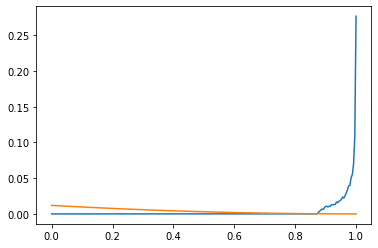

<Figure size 432x288 with 0 Axes>

In [5]:
params = torch.randn(12,)
print(params)
Loss(params,verbose=1)